In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go


<function matplotlib.pyplot.show(close=None, block=None)>

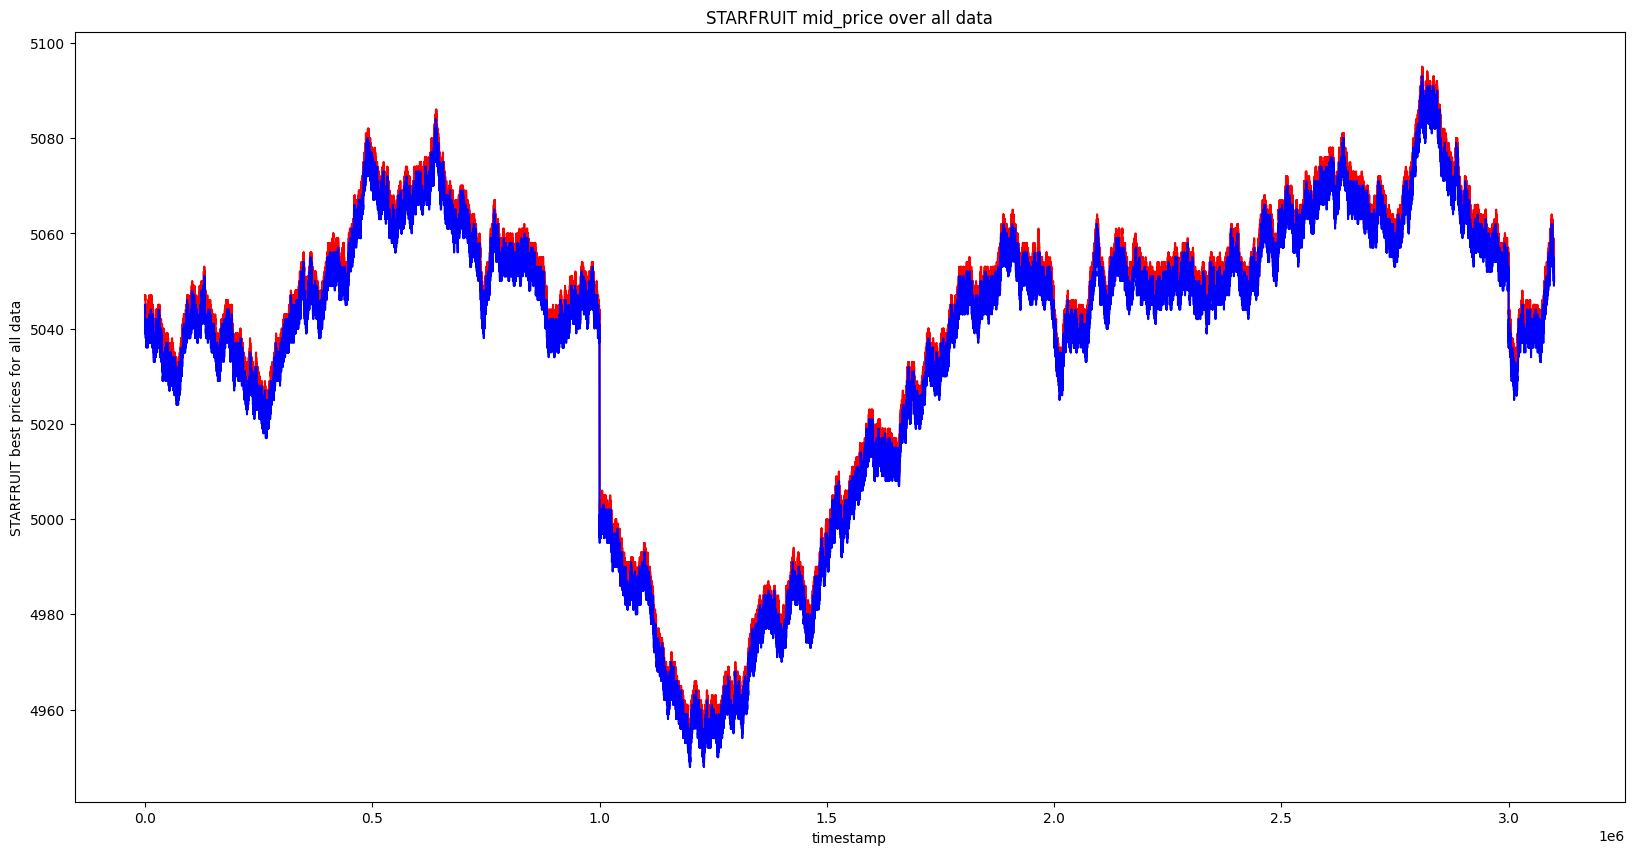

In [84]:
cumulative_data = pd.concat([pd.read_csv('DayData/Day_-1.csv'), pd.read_csv('DayData/Day_-2.csv'), pd.read_csv('DayData/Day_0.csv'), pd.read_csv('DayData/Day_1.csv')])
cumulative_data.reset_index(inplace=True)
cumulative_data.drop(columns=['index'], inplace=True)

star_data = cumulative_data[cumulative_data['product'] == 'STARFRUIT'].copy()
star_data['cumulative_timestamp'] = range(0, (len(star_data) * 100), 100)
star_data.set_index('cumulative_timestamp', inplace=True)

plt.figure(figsize=(20,10))
plt.plot(star_data.index, star_data['ask_price_1'], label='ask_price_1', color='red')
plt.plot(star_data.index, star_data['bid_price_1'], label='bid_price_1', color='blue')
plt.xlabel('timestamp')
plt.ylabel('STARFRUIT best prices for all data')
plt.title('STARFRUIT mid_price over all data')
plt.show

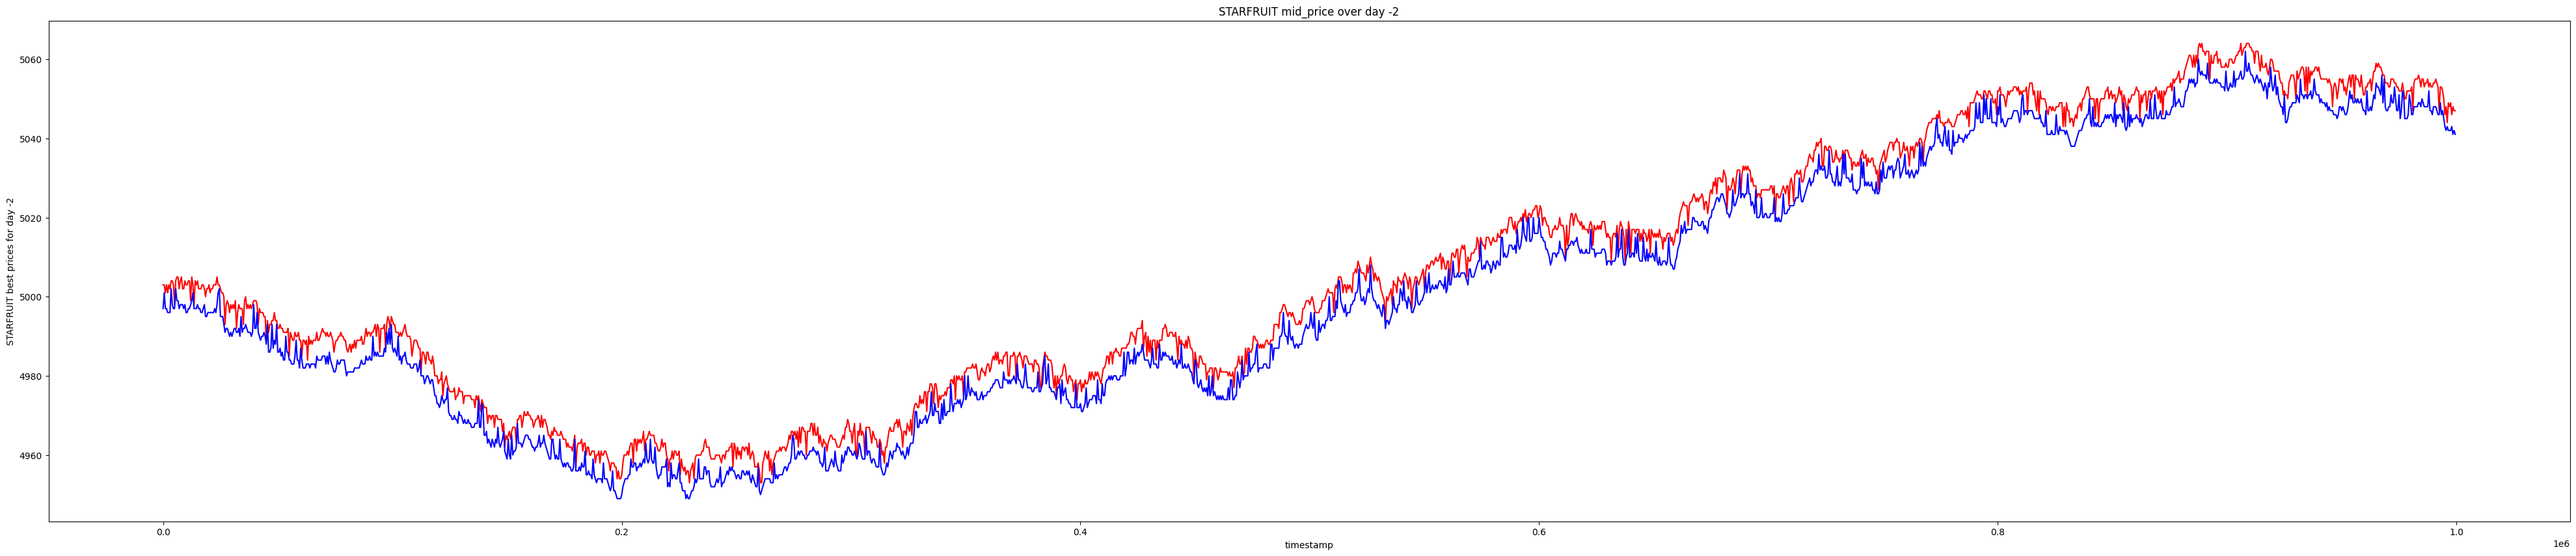

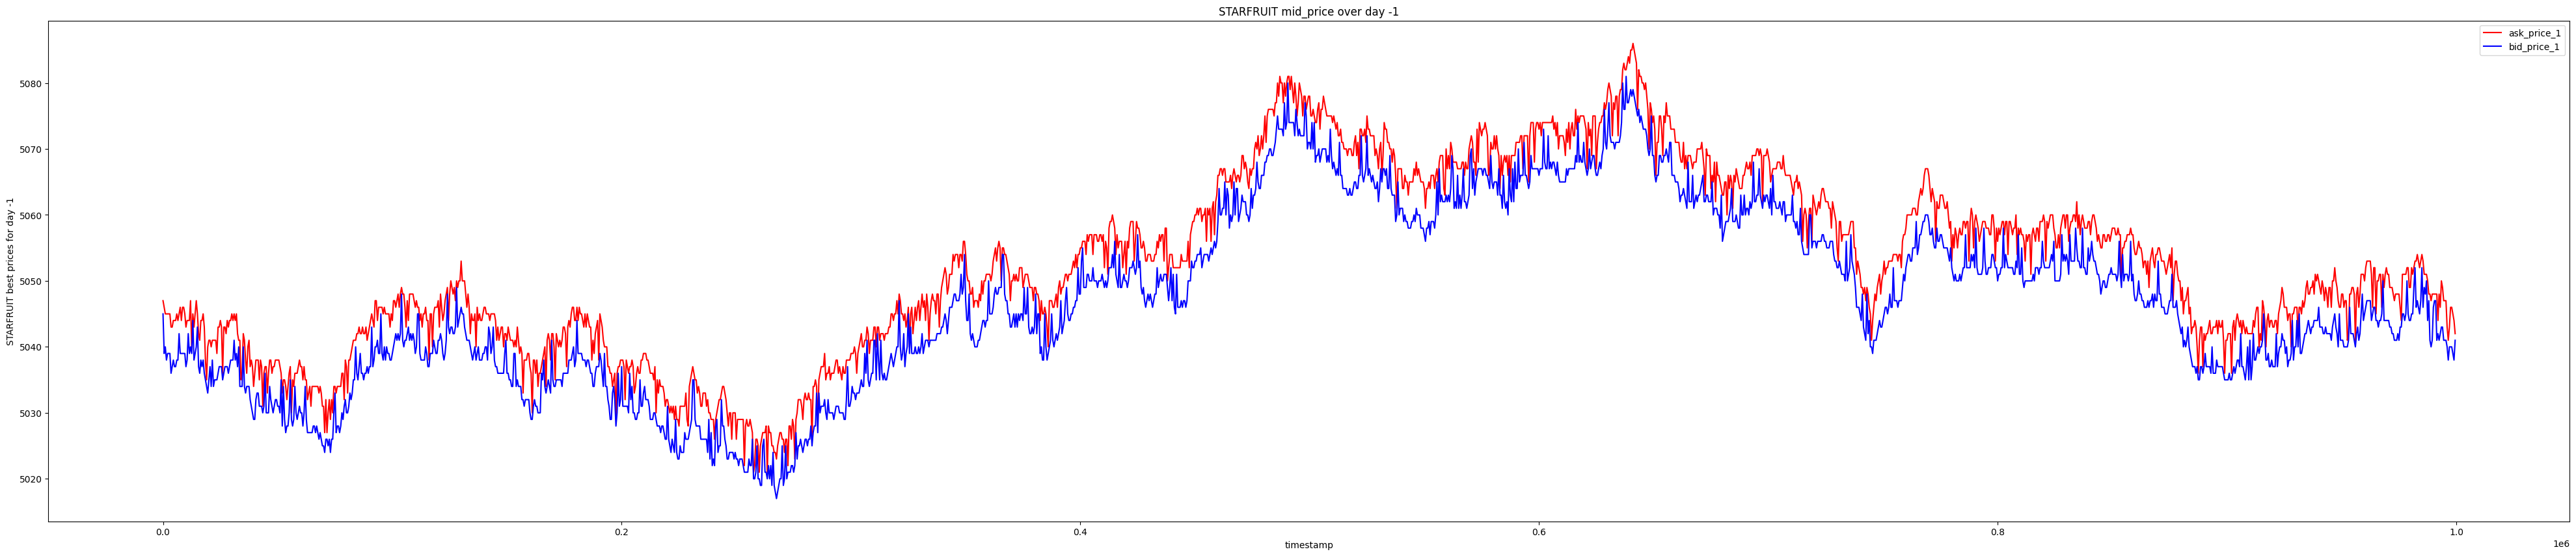

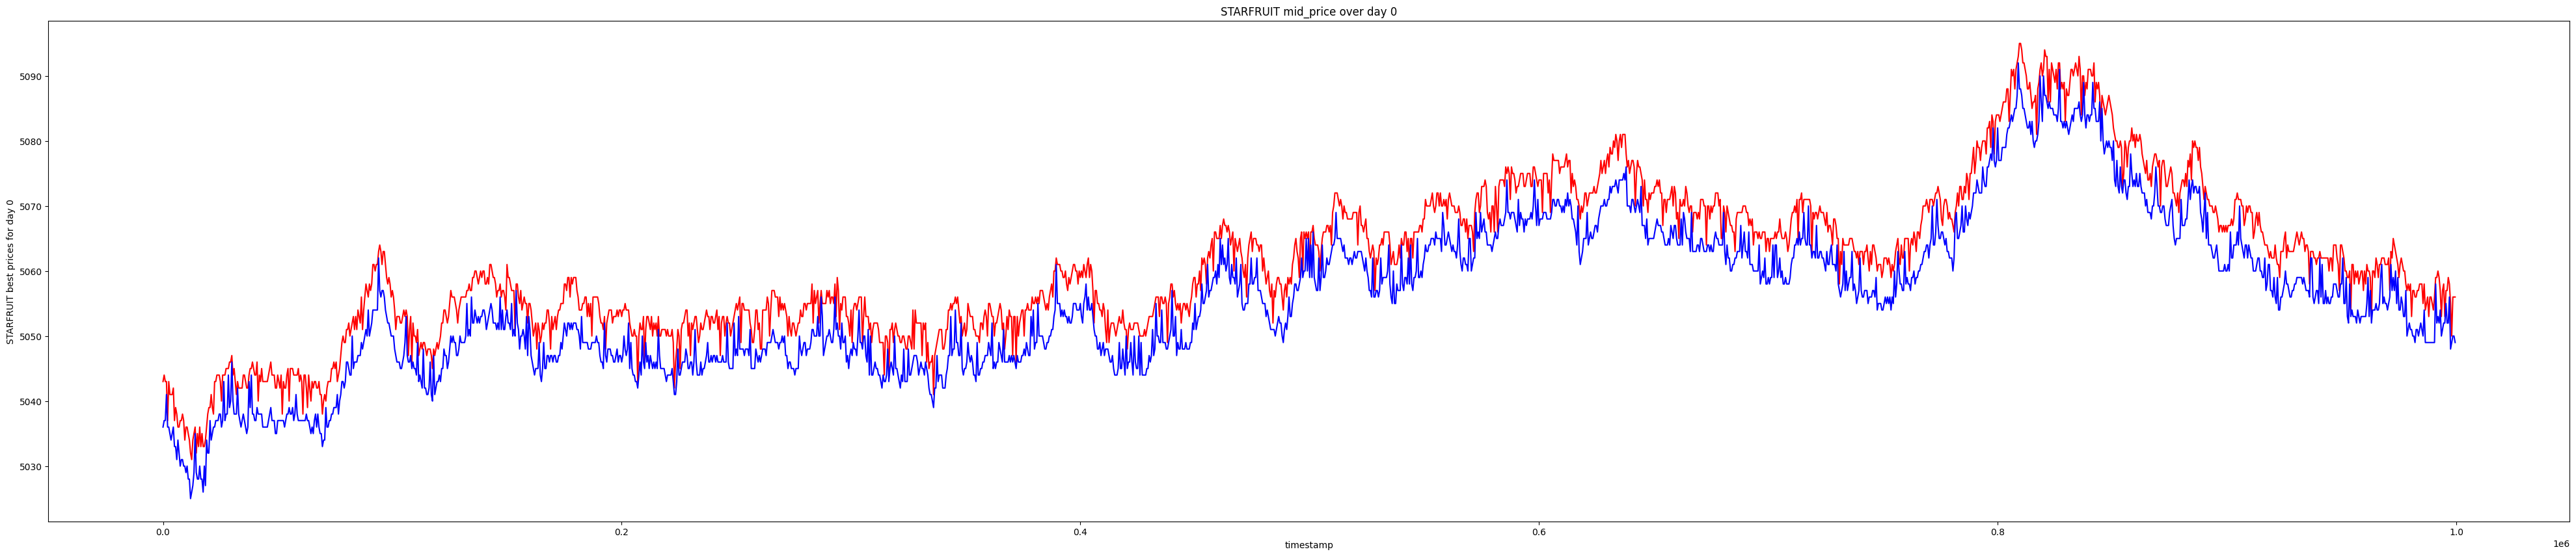

Text(0.5, 1.0, 'STARFRUIT mid_price over day 1')

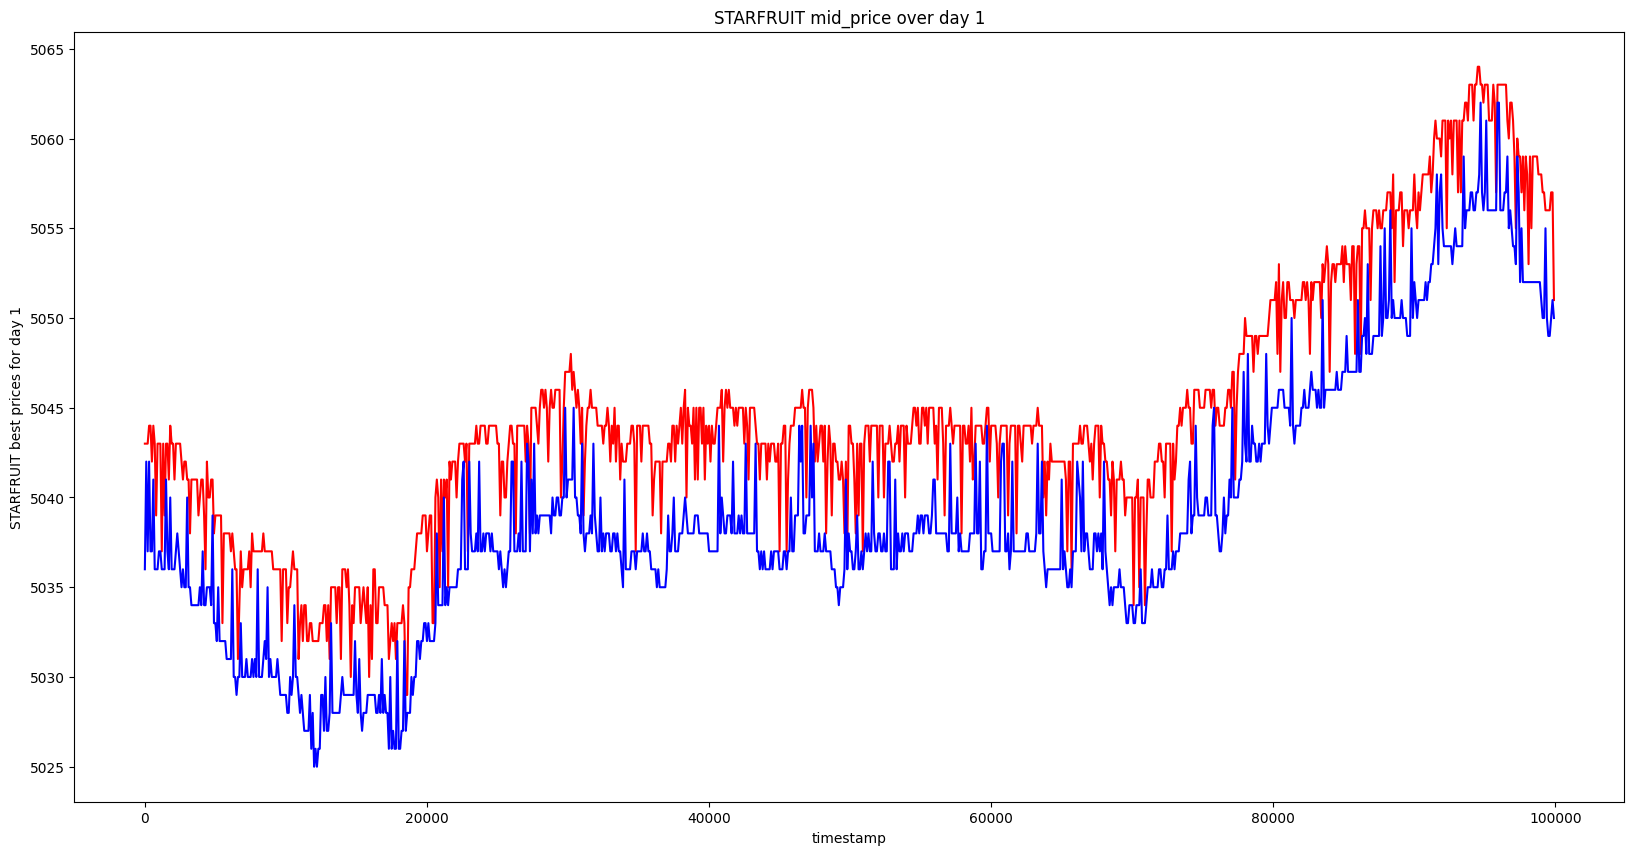

In [85]:
star_day_minus_two = star_data[star_data['day'] == -2].copy()
star_day_minus_two.set_index('timestamp', inplace=True)
star_day_minus_two = star_day_minus_two.iloc[::5]

plt.figure(figsize=(50,10))
plt.plot(star_day_minus_two.index, star_day_minus_two['ask_price_1'], label='ask_price_1', color='red')
plt.plot(star_day_minus_two.index, star_day_minus_two['bid_price_1'], label='bid_price_1', color='blue')
plt.xlabel('timestamp')
plt.ylabel('STARFRUIT best prices for day -2')
plt.title('STARFRUIT mid_price over day -2')

star_day_one = star_data[star_data['day'] == 1].copy()
star_day_one.set_index('timestamp', inplace=True)

star_day_minus_one = star_data[star_data['day'] == -1].copy()
star_day_minus_one.set_index('timestamp', inplace=True)
star_day_minus_one = star_day_minus_one.iloc[::5]

plt.figure(figsize=(50,10))
plt.plot(star_day_minus_one.index, star_day_minus_one['ask_price_1'], label='ask_price_1', color='red')
plt.plot(star_day_minus_one.index, star_day_minus_one['bid_price_1'], label='bid_price_1', color='blue')
plt.xlabel('timestamp')
plt.ylabel('STARFRUIT best prices for day -1')
plt.title('STARFRUIT mid_price over day -1')
plt.legend()

star_day_zero = star_data[star_data['day'] == 0].copy()
star_day_zero.set_index('timestamp', inplace=True)
star_day_zero = star_day_zero.iloc[::5]

plt.figure(figsize=(50,10))
plt.plot(star_day_zero.index, star_day_zero['ask_price_1'], label='ask_price_1', color='red')
plt.plot(star_day_zero.index, star_day_zero['bid_price_1'], label='bid_price_1', color='blue')
plt.xlabel('timestamp')
plt.ylabel('STARFRUIT best prices for day 0')
plt.title('STARFRUIT mid_price over day 0')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(star_day_one.index, star_day_one['ask_price_1'], label='ask_price_1', color='red')
plt.plot(star_day_one.index, star_day_one['bid_price_1'], label='bid_price_1', color='blue')
plt.xlabel('timestamp')
plt.ylabel('STARFRUIT best prices for day 1')
plt.title('STARFRUIT mid_price over day 1')


In [86]:

CANDLESTICK_INTERVAL = 500

# Create empty lists to store the OHLC data
opens, closes, highs, lows = [], [], [], []

for i in range (0, (len(star_data)), CANDLESTICK_INTERVAL):
    try:
        candlestick = star_data.iloc[i:i+CANDLESTICK_INTERVAL]
        open_price = candlestick['mid_price'].iloc[0]
        close_price = candlestick['mid_price'].iloc[-1]
        high_price = candlestick['mid_price'].max()
        low_price = candlestick['mid_price'].min()

        # Append the OHLC data to the lists
        opens.append(open_price)
        closes.append(close_price)
        highs.append(high_price)
        lows.append(low_price)
    except IndexError:
        print(f"Caught an IndexError at i = {i}")
        break

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=star_data.index[::CANDLESTICK_INTERVAL],
                                     open=opens,
                                     high=highs,
                                     low=lows,
                                     close=closes)])
fig.show()